# <center> Homework3 : 分类、预测与聚类
### <center> 吕芳蕊 3120201053
### <center> [github仓库链接] : https://github.com/feimo49/Datamine/tree/main/Homework3

## 第一章：问题描述

题目：Video Game Sales 电子游戏销售分析
数据集：Video Game Sales

该数据集包含游戏名称、类型、发行时间、发布者以及在全球各地的销售额数据。

数据量：11列共1.66W数据。

基于这个数据集，可进行以下问题的探索：

- 电子游戏市场分析：受欢迎的游戏、类型、发布平台、发行人等；
- 预测每年电子游戏销售额。
- 可视化应用：如何完整清晰地展示这个销售故事。
也可以自行发现其他问题，并进行相应的挖掘。

## 第二章： 数据处理

首先导入数据集，查看数据概要

In [2]:
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline
dataset_path = "../data/vgsales.csv"
dataset = pd.read_csv(dataset_path)
dataset_origin = pd.read_csv(dataset_path)

dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


根据以上数据概要可以知道 Video Game Sales数据集的的属性包括：
- Rank 游戏销量排名
- Name 游戏名
- Year 发布年份
- Platform 游戏平台/发布平台
- Genre 游戏类型
- Publisher 游戏厂商/发行人
- NA_Sales EU_Sales JP_Sales Other_Sales Global_Sales 北美销量 欧洲销量 日本销量 其它地区销量 全球销量

接下来查看数据集中存在的缺失值并对其进行处理

In [5]:
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Year和Publisher属性存在缺失，删除空值所在的行。

In [6]:
dataset.dropna(inplace=True)

## 第三章： 问题探索

### 3.1 电子游戏市场分析

In [7]:
print(dataset.iloc[0,:])

Rank                     1
Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object


可以看到不同游戏按照不同平台、不同发行年份统计销量，区分平台和年份的话，最受欢迎的游戏是2006年Wii的**Wii Sports**，全球销量达到了82.74

In [8]:
dataset.groupby("Name").sum()["Global_Sales"].idxmax(axis=0,skipna=True)

'Wii Sports'

不区分平台和年份的情况，最受欢迎的游戏依然是**Wii Sports**

In [9]:
dataset.groupby("Genre").sum()["Global_Sales"].idxmax(axis=0,skipna=True)

'Action'

最受欢迎的游戏类型为**Action**

In [10]:
dataset.groupby("Platform").sum()["Global_Sales"].idxmax(axis=0,skipna=True)

'PS2'

最受欢迎的发布平台是**PS2**

In [11]:
dataset.groupby("Publisher").sum()["Global_Sales"].idxmax(axis=0,skipna=True)

'Nintendo'

最受欢迎的发行人是**Nintendo**

### 3.2 预测电子游戏销售额

#### 1. 预测每年全球电子游戏销售额

由于该数据更新于4年前，所以删除2015年之后的数据，然后绘制历年全球电子游戏销售额的散点图

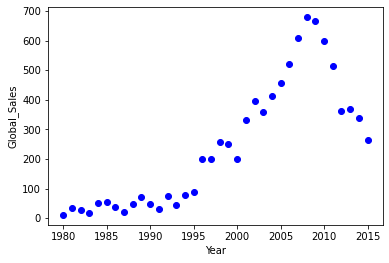

In [13]:
total_sales = dataset.drop(dataset[dataset["Year"]>2015].index).groupby("Year").sum()["Global_Sales"]

import  matplotlib.pyplot as plt
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.scatter(total_sales.keys(),total_sales,c='b')

建立回归模型

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X = []
y = []
for i in total_sales.keys():
    X.append([i])
    y.append(total_sales[i])

polynomial = PolynomialFeatures(degree = 3)
x_transformed = polynomial.fit_transform(X)
 
poly_linear_model = LinearRegression()
poly_linear_model.fit(x_transformed, y)

LinearRegression()

预测游戏销售额并显示可视化结果

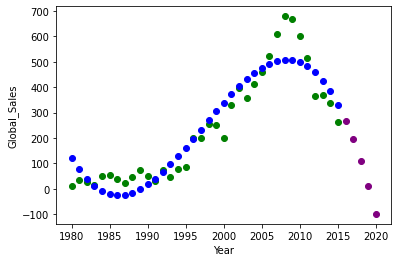

In [22]:
predict_x = [[2016],[2017],[2018],[2019],[2020]]
predict_x_tran = polynomial.fit_transform(predict_x)
predict_y = poly_linear_model.predict(predict_x_tran)
test_y = poly_linear_model.predict(polynomial.fit_transform(X))
plt.xlabel('Year')
plt.ylabel('Global_Sales')
plt.scatter(total_sales.keys(),total_sales,label='real',c='g')
plt.scatter(X,test_y,label='predict',c='b')
plt.scatter(predict_x,predict_y,label='predict',c='purple')

In [23]:
predict_y

array([268.61369491, 195.00754571, 109.71723437,  12.15168691,
       -98.28017354])

#### 2.预测某一款游戏的全球销售额
以Animal Crossing: New Horizons为例，预测其销售量。

*Animal Crossing: New Horizons于2020-03-20由Nintendo发行，发行平台Nintendo Switch，模拟经营类（Simulation）游戏*

In [24]:
example = {"Name":"Animal Crossing: New Horizons",
           "name1":"Animal",
           "name2":"Crossing:",
           "name3":"New",
           "Platform":"Nintendo Switch",
           "year":2020.0,
           "Publisher":"Nintendo",
           "Genre":"Simulation"
          }

选取数据集80%的游戏的销售情况作为训练集，建立决策树预测模型.

首先准备训练数据

In [25]:
dataset_train = dataset.drop(["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],axis = 1)
dataset_train_baka = dataset_train.copy(deep=True)
#print(dataset_train_baka)
name1,name2,name3 = [],[],[]
for index, row in dataset_train.iterrows():
    array = row[0].split(" ")
    name1.append(array[0])
    name2.append("NaN" if len(array) < 2 else array[1])
    name3.append("NaN" if len(array) < 3 else array[2])
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dataset_train["Platform"] = le.fit_transform(dataset_train["Platform"].values)
dataset_train["Genre"] = le.fit_transform(dataset_train["Genre"].values)
dataset_train["Publisher"] = le.fit_transform(dataset_train["Publisher"].values)

dataset_train["name1"] = le.fit_transform(name1)
dataset_train["name2"] = le.fit_transform(name2)
dataset_train["name3"] = le.fit_transform(name3)
dataset_train = dataset_train.drop(["Name"],axis = 1)
dataset_train

,Platform,Year,Genre,Publisher,Global_Sales,name1,name2,name3
0,26,2006.0,10,359,82.74,3674,2850,1799
1,11,1985.0,4,359,40.24,3267,1924,455
2,26,2008.0,6,359,35.82,2060,1706,2883
3,26,2009.0,10,359,33.00,3674,2850,2186
4,5,1996.0,7,359,31.37,2588,2492,422
...,...,...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,3699,3299,3012
16594,7,2003.0,8,241,0.01,2115,3398,408
16595,16,2008.0,6,21,0.01,2897,1594,348
16596,4,2010.0,5,8,0.01,1848,1533,71


训练模型

In [26]:
X = []
y = []
X_test,y_test = [],[]
X_train,y_train = [],[]
X = list(zip(dataset_train["Platform"],dataset_train["Year"],dataset_train["Publisher"],dataset_train["name1"],dataset_train["name2"],\
    dataset_train["name3"]))
y = list(dataset_train["Global_Sales"])
y = list(map(int,y))
# print(len(X))
# print(len(y))
for i in range(0,len(X)):
    if i%5 == 0:
        X_test.append(X[i])
        y_test.append(y[i])
    else:
        X_train.append(X[i])
        y_train.append(y[i])     
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

可视化展示测试集结果的误差：

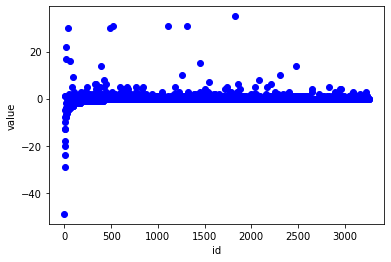

In [27]:
y_predict = dtree.predict(X_test)

plt.xlabel('id')
plt.ylabel('value')
xarary = list(range(0,len(X_test)))
plt.scatter(xarary,y_predict-y_test,c='b')

模型的预测准确率为：

In [28]:
dtree.score(X_test,y_test)

0.8045412703283216

接下来应用该模型预测Animal Crossing: New Horizons的销量

In [29]:
example = {"Name":"Animal Crossing: New Horizons",
           "name1":"Animal",
           "name2":"Crossing:",
           "name3":"New",
           "Platform":"NS",
           "Year":2020.0,
           "Publisher":"Nintendo",
           "Genre":"Simulation"
          }
dataset_train_baka["name1"] = name1
dataset_train_baka["name2"] = name2
dataset_train_baka["name3"] = name3

platform_dict = dict(zip(dataset_train_baka["Platform"].values, dataset_train["Platform"].values))
gen_dict = dict(zip(dataset_train_baka["Genre"].values, dataset_train["Genre"].values))
pub_dict = dict(zip(dataset_train_baka["Publisher"].values, dataset_train["Publisher"].values))
name1_dict = dict(zip(dataset_train_baka["name1"].values, dataset_train["name1"].values))
name2_dict = dict(zip(dataset_train_baka["name2"].values, dataset_train["name2"].values))
name3_dict = dict(zip(dataset_train_baka["name3"].values, dataset_train["name3"].values))

example_array = [[platform_dict.get(example["Platform"]),
                  example["Year"],
                  pub_dict.get(example["Publisher"]),
                  name1_dict.get(example["name1"]),
                  name2_dict.get(example["name2"]),
                  name3_dict.get(example["name3"]),
                 ]]
#platform_dict
example_array

[[None, 2020.0, 359, 165, 791, 1831]]

预测结果为：

In [30]:
x =  dataset_train["Platform"].mode()[0]
example_array[0][0] = x
print(dtree.predict(example_array))

[9]


### 3.3 可视化应用

#### **Q： 如何开发一款可能更受欢迎的游戏？**

#### Step 1. 游戏类型选择

<AxesSubplot:xlabel='Genre'>

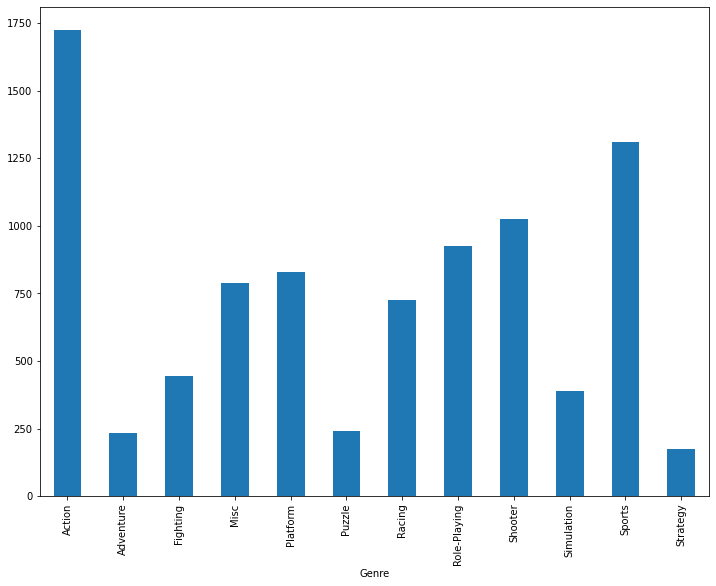

In [33]:
dataset.groupby("Genre").sum()["Global_Sales"].plot(kind='bar',figsize=(12,9))

由此看出，选择动作类和体育类的游戏占据了比较大的市场.

接下来看不同类型游戏的销量均值：

<AxesSubplot:xlabel='Genre'>

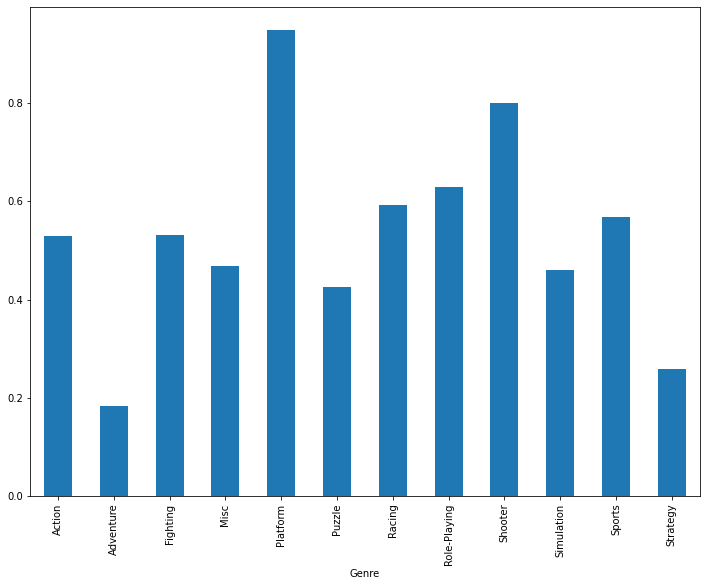

In [34]:
dataset.groupby("Genre").mean()["Global_Sales"].plot(kind='bar',figsize=(12,9))

可以看出，虽然动作类和体育类的游戏占据了比较大的市场，但是就平均销量而言，平台类和射击类游戏的的销量更高。

综合两个图来看，冒险类和策略类游戏的总销量和平均销量都是最后两位，所以开发这两种的类型的游戏可能对销量造成一定的影响。

#### Step 2. 游戏平台选择

可视化历年来不同平台的总销售量

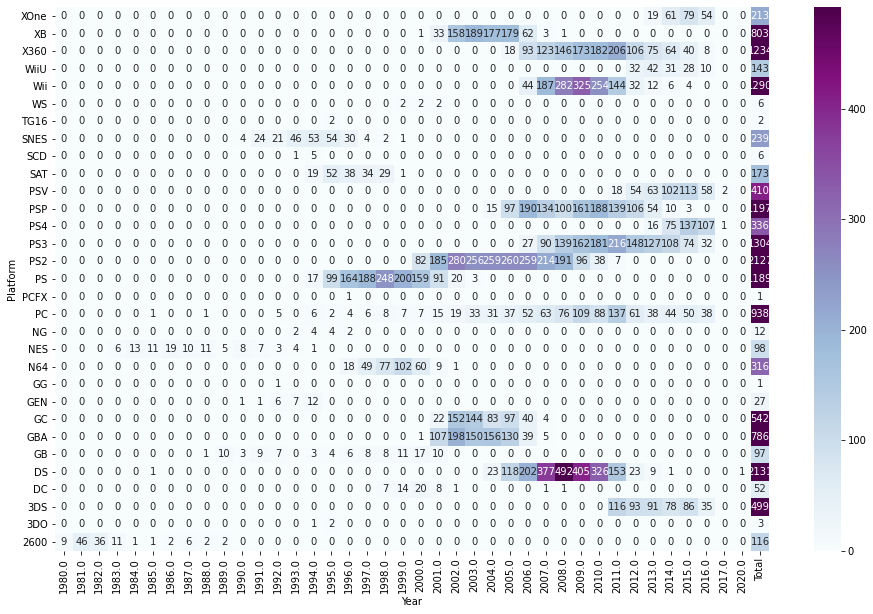

In [39]:
import seaborn
f = pd.crosstab(dataset.Platform,dataset.Year).sort_values(by="Platform",ascending = False)
max = f.values.max()
min = f.values.min()
f['Total'] = f.sum(axis=1)
plt.figure(figsize=(16,10))
seaborn.heatmap(f, vmin = min, vmax = max, annot=True,cmap='BuPu', fmt="d")
plt.xticks()
plt.show()

可以看到，PS系列已知以来是来比较热门的游戏主机，此外近年来比较游戏销量比较高的平台还有X360、3DS、Wii和PC。

#### Step 3. 游戏厂商选择

可视化历年来前50位的不同厂商游戏的累计销量

<AxesSubplot:>

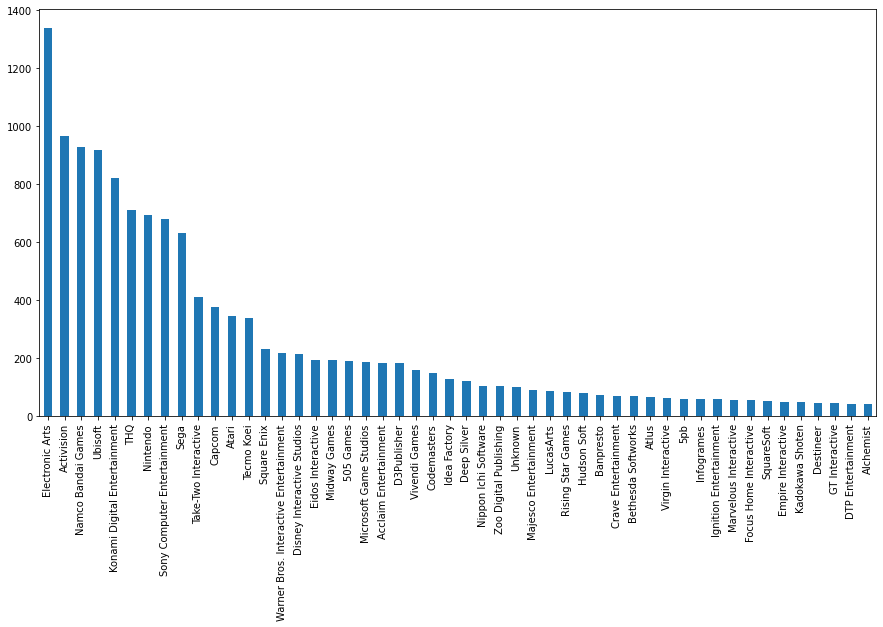

In [41]:
dataset["Publisher"].value_counts()[:50].plot(kind='bar',figsize=(15,7.5))

由此看出，考虑合作的游戏厂商或者是作为参照的厂商可以从Electronics Ats、Activision、Namco Bandai Games、Ubisoft、Konami Digital Entertainment、THQ、Nintendo、Sony Computer Entertainment等厂商中选择。

In [42]:
dataset["Publisher"].value_counts()[:8]

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Name: Publisher, dtype: int64